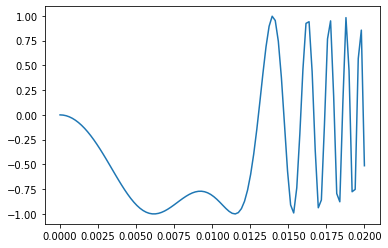

In [2]:
%matplotlib inline
import numpy as np
import scipy.signal
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

class PhaseContrastTransfer:
    def __init__(self):
        #crystal parameters
        self.a = 8.79600e-10
        self.b = 8.79600e-10
        self.c = 12.22800e-10
        self.alpha = np.pi/2
        self.beta = np.pi/2
        self.ganma = np.pi/2
        
        #wave_length[m]
        self.lamb = 0.02508e-10
        #wave_number
        self.k = 2*np.pi/self.lamb
        #range[Å]
        self.deltaZ = 8.79600e-10
        
        #spherical aberration constant[m]
        self.Cs = 0.5e-3
        
        #Scherzer Focus
        self.deltaf = 1.2*(self.Cs*self.lamb)**(1/2)
        
        self.G = [[self.a**2, self.a*self.b*np.cos(self.ganma), self.a*self.c*np.cos(self.beta)], [self.b*self.a*np.cos(self.ganma), self.b**2, self.b*self.a*np.cos(self.alpha)], [self.c*self.a*np.cos(self.beta), self.c*self.b*np.cos(self.alpha), self.c**2]]
        self.invG = np.linalg.inv(self.G)
        
    def spherical_aberration(self, kx):
        chi = 2*np.pi/self.lamb
        chi = chi*(1/4*self.Cs*kx**4 - 1/2*self.deltaf*kx**2)
        
        return chi

    def run(self):
        a = np.linspace(0, 0.02, num=100)
        chi = self.spherical_aberration(a)
        
        CTF = np.cos(-1/2*np.pi + chi)
        
        plt.plot(a, CTF)

        
if __name__ == '__main__':
    a = PhaseContrastTransfer()
    a.run()

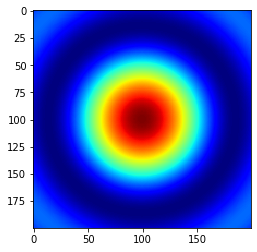

In [3]:
%matplotlib inline
import numpy as np
import scipy.signal
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

class PhaseContrastTransfer:
    def __init__(self):
        #crystal parameters
        self.a = 8.79600e-10
        self.b = 8.79600e-10
        self.c = 12.22800e-10
        self.alpha = np.pi/2
        self.beta = np.pi/2
        self.ganma = np.pi/2
        
        #wave_length[m]
        self.lamb = 0.02508e-10
        #wave_number
        self.k = 2*np.pi/self.lamb
        #range[m]
        self.deltaZ = 8.79600e-10
        self.N = 200
        
        self.D = 5
        
        #camela length[m]
        self.camela_length = 200e-2
        
        #spherical aberration constant[m]
        self.Cs = 0.5e-3
        
        #Scherzer Focus
        self.deltaf = 1.2*(self.Cs*self.lamb)**(1/2)
        
        self.G = [[self.a**2, self.a*self.b*np.cos(self.ganma), self.a*self.c*np.cos(self.beta)], [self.b*self.a*np.cos(self.ganma), self.b**2, self.b*self.a*np.cos(self.alpha)], [self.c*self.a*np.cos(self.beta), self.c*self.b*np.cos(self.alpha), self.c**2]]
        self.invG = np.linalg.inv(self.G)
    
    def spherical_aberration(self, h, k):
        hkl = [h, k, 0]
        thkl = np.transpose(hkl)
        dk = 1/((np.matmul(np.matmul(self.invG, thkl), hkl))**(1/2))
        u = self.lamb/(2*dk)
        chi = 2*np.pi/self.lamb
        chi = chi*(1/4*self.Cs*u**4 - 1/2*self.deltaf*u**2)
        
        return chi
    
    def run(self):
        Kx, Ky = np.meshgrid(np.linspace(-self.D, self.D, num=self.N), np.linspace(-self.D, self.D, num=self.N))
        
        spherical_abberration = np.vectorize(self.spherical_aberration)
        Chi = spherical_abberration(Kx, Ky)
        CTF = np.cos(-1/2*np.pi + Chi)
        
        plt.imshow(CTF, cmap='jet')
        
        
if __name__ == '__main__':
    a = PhaseContrastTransfer()
    a.run()

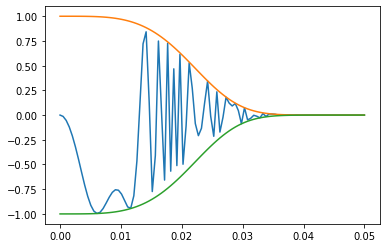

In [4]:
%matplotlib inline
import numpy as np
import scipy.signal
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

class PhaseContrastTransfer:
    def __init__(self):
        #crystal parameters
        self.a = 8.79600e-10
        self.b = 8.79600e-10
        self.c = 12.22800e-10
        self.alpha = np.pi/2
        self.beta = np.pi/2
        self.ganma = np.pi/2
        
        #wave_length[m]
        self.lamb = 0.02508e-10
        #wave_number
        self.k = 2*np.pi/self.lamb
        #range[Å]
        self.deltaZ = 8.79600e-10
        
        #spherical aberration constant[m]
        self.Cs = 0.5e-3
        
        #Scherzer Focus
        self.deltaf = 1.2*(self.Cs*self.lamb)**(1/2)
        
        self.deltaE = 1.0e-6
        self.deltaJ = 0.5e-6
        
        #Chromatic aberration constant[m]
        self.Cc = 1.4e-3
        
        #Envelope function gaussian sigma[m]
        self.sig = self.Cc*((self.deltaE)**2 + (2*self.deltaJ)**2)**(1/2)
        
        self.G = [[self.a**2, self.a*self.b*np.cos(self.ganma), self.a*self.c*np.cos(self.beta)], [self.b*self.a*np.cos(self.ganma), self.b**2, self.b*self.a*np.cos(self.alpha)], [self.c*self.a*np.cos(self.beta), self.c*self.b*np.cos(self.alpha), self.c**2]]
        self.invG = np.linalg.inv(self.G)
        
    def spherical_aberration(self, kx):
        chi = 2*np.pi/self.lamb
        chi = chi*(1/4*self.Cs*kx**4 - 1/2*self.deltaf*kx**2)
        
        return chi
        
    def chromatic_aberration(self, kx):
        w = np.exp(-(1/2)*(np.pi**2)*(kx**4)*(self.sig**2)/(self.lamb**2))
        return w

    def run(self):
        kx = np.linspace(0, 0.05, num=100)
        Ed = self.chromatic_aberration(kx)
        chi = self.spherical_aberration(kx)
        
        CTF = np.cos(-1/2*np.pi + chi)*Ed
        
        plt.plot(kx, CTF)
        plt.plot(kx, Ed)
        plt.plot(kx, -Ed)
        
        
if __name__ == '__main__':
    a = PhaseContrastTransfer()
    a.run()

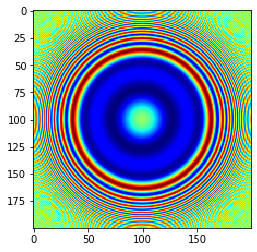

In [5]:
%matplotlib inline
import numpy as np
import scipy.signal
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

class PhaseContrastTransfer:
    def __init__(self):
        #crystal parameters
        self.a = 2.8665e-10
        self.b = 2.8665e-10
        self.c = 2.8665e-10
        self.alpha = np.pi/2
        self.beta = np.pi/2
        self.ganma = np.pi/2
        
        #wave_length[Å]
        self.lamb = 0.02508e-10
        #wave_number
        self.k = 2*np.pi/self.lamb
        #range[m]
        self.deltaZ = 2.8665e-10
        self.N = 200
        
        self.D = 5
        
        #accelerating Voltage[eV]
        self.EeV = 200e3
        #accelerating Voltage[J]
        self.E = self.EeV*1.60218e-19
        
        #camela length[m]
        self.camela_length = 200e-2
        
        #spherical aberration constant[m]
        self.Cs = 0.5e-3
        
        #Scherzer Focus
        self.deltaf = 1.2*(self.Cs*self.lamb)**(1/2)
        
        #Energy spread and Current spread[m]
        self.deltaE = 1.0e-6
        self.deltaJ = 0.5e-6
        
        #Chromatic aberration constant[m]
        self.Cc = 1.4e-3
        
        #Envelope function gaussian sigma[m]
        self.sig = self.Cc*((self.deltaE)**2 + (2*self.deltaJ)**2)**(1/2)
        
        self.G = [[self.a**2, self.a*self.b*np.cos(self.ganma), self.a*self.c*np.cos(self.beta)], [self.b*self.a*np.cos(self.ganma), self.b**2, self.b*self.a*np.cos(self.alpha)], [self.c*self.a*np.cos(self.beta), self.c*self.b*np.cos(self.alpha), self.c**2]]
        self.invG = np.linalg.inv(self.G)
    
    def spherical_aberration(self, h, k):
        hkl = [h, k, 0]
        thkl = np.transpose(hkl)
        dk = 1/((np.matmul(np.matmul(self.invG, thkl), hkl))**(1/2))
        u = self.lamb/(2*dk)
        chi = 2*np.pi/self.lamb
        chi = chi*(1/4*self.Cs*u**4 - 1/2*self.deltaf*u**2)
        
        return chi
    
    def chromatic_aberration(self, h, k):
        hkl = [h, k, 0]
        thkl = np.transpose(hkl)
        dk = 1/((np.matmul(np.matmul(self.invG, thkl), hkl))**(1/2))
        u = self.lamb/(2*dk)
        w = np.exp(-(1/2)*(np.pi**2)*(u**4)*(self.sig**2)/(self.lamb**2))
        return w
    
    def run(self):
        Kx, Ky = np.meshgrid(np.linspace(-self.D, self.D, num=self.N), np.linspace(-self.D, self.D, num=self.N))
        
        spherical_abberration = np.vectorize(self.spherical_aberration)
        Chi = spherical_abberration(Kx, Ky)
        chromatic_aberration = np.vectorize(self.chromatic_aberration)
        Ed = chromatic_aberration(Kx, Ky)
        CTF = np.cos(-1/2*np.pi + Chi)*Ed
        
        plt.imshow(CTF, cmap='jet')
        
        
if __name__ == '__main__':
    a = PhaseContrastTransfer()
    a.run()

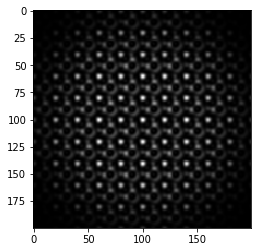

In [6]:
%matplotlib inline
import numpy as np
import scipy.signal
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

class MultiSlice:
    def __init__(self):
        #crystal parameters
        self.a = 2.8665e-10
        self.b = 2.8665e-10
        self.c = 2.8665e-10
        self.alpha = np.pi/2
        self.beta = np.pi/2
        self.ganma = np.pi/2
        
        #wave_length[m]
        self.lamb = 0.02508e-10
        #wave_number
        self.k = 2*np.pi/self.lamb
        #range[m]
        self.deltaZ = 2.8665e-10/2
        self.N = 200
        
        self.D = 5
        
        #accelerating Voltage[eV]
        self.EeV = 200e3
        #accelerating Voltage[J]
        self.E = self.EeV*1.60218e-19
        #camela length[m]
        self.camela_length = 200e-2
        
        #spherical aberration constant[m]
        self.Cs = 0.5e-3
        #Scherzer Focus
        self.deltaf = 1.2*(self.Cs*self.lamb)**(1/2)
        
        #Energy spread and Current spread[m]
        self.deltaE = 1.0e-6
        self.deltaJ = 0.5e-6
        #Chromatic aberration constant[m]
        self.Cc = 1.4e-3
        #Envelope function gaussian sigma[m]
        self.sig = self.Cc*((self.deltaE)**2 + (2*self.deltaJ)**2)**(1/2)
        
        self.param_fe = [[0.5627, 0.3859], [1.9685, 3.3103], [2.4527, 18.7003], [2.1750, 71.6636]]
        
        self.G = [[self.a**2, self.a*self.b*np.cos(self.ganma), self.a*self.c*np.cos(self.beta)], [self.b*self.a*np.cos(self.ganma), self.b**2, self.b*self.a*np.cos(self.alpha)], [self.c*self.a*np.cos(self.beta), self.c*self.b*np.cos(self.alpha), self.c**2]]
        self.invG = np.linalg.inv(self.G)
        
        self.sigma = np.pi/(self.lamb*self.E)
        
        self.layers = ['./pos_1.csv', './pos_2.csv', './pos_1.csv', './pos_1.csv', './pos_2.csv', './pos_1.csv']
        
    def import_crystal_position(self, file_name):
        df = pd.read_csv(file_name, encoding="UTF-8")
        x = list(df['x'])
        y = list(df['y'])
        z = list(df['z'])
        r = []
        for i in range(len(x)):
            r.append([x[i], y[i], z[i]])
            
        return r
        
    def compute_F(self, h, k, r):
        fa = 0
        hkl = [h, k, 0]
        thkl = np.transpose(hkl)
        dk = 1/((np.matmul(np.matmul(self.invG, thkl), hkl))**(1/2))
        if(not np.isinf(dk)):
            sinthetalamb = self.lamb/(2*dk)
            for i in range(4):
                fa = fa + self.param_fe[i][0]*np.exp((-self.param_fe[i][1]*(sinthetalamb**2)))
            
        F = 0
        for i in r:
            F = F + fa*np.exp(1.0j*2*np.pi*(h*i[0] + k*i[1]))
        
        return F
    
    def propagator(self, h, k):
        #excitation error
        zeta = self.lamb/2
        zeta = zeta*(h**2 + k**2)
        
        p = np.exp(1.0j*2*np.pi*zeta*self.deltaZ)
        
        return p
    
    def spherical_aberration(self, h, k):
        hkl = [h, k, 0]
        thkl = np.transpose(hkl)
        dk = 1/((np.matmul(np.matmul(self.invG, thkl), hkl))**(1/2))
        u = self.lamb/(2*dk)
        chi = 2*np.pi/self.lamb
        chi = chi*(1/4*self.Cs*u**4 - 1/2*self.deltaf*u**2)
        
        return chi
    
    def chromatic_aberration(self, h, k):
        hkl = [h, k, 0]
        thkl = np.transpose(hkl)
        dk = 1/((np.matmul(np.matmul(self.invG, thkl), hkl))**(1/2))
        u = self.lamb/(2*dk)
        w = np.exp(-(1/2)*(np.pi**2)*(u**4)*(self.sig**2)/(self.lamb**2))
        return w

    def run(self):
        Kx, Ky = np.meshgrid(np.linspace(-self.D, self.D, num=self.N), np.linspace(-self.D, self.D, num=self.N))
        
        f = np.vectorize(self.compute_F)
        f.excluded.add(2)
        
        propagator = np.vectorize(self.propagator)
        
        psi = np.ones((self.N, self.N))
        
        for i in range(len(self.layers) - 1):
            r = self.import_crystal_position(self.layers[i])
            F = f(Kx, Ky, r)
            Vp = np.fft.ifft2(F)
            #weak-phase object approximation
            q = 1 + 1.0j*self.sigma*Vp
            p = propagator(Kx, Ky)
            
            psi = np.fft.fft2(q*psi)*p
            if(i == len(self.layers) - 1):
                break
            else:
                psi = np.fft.ifft2(psi)
        
        spherical_abberration = np.vectorize(self.spherical_aberration)
        Chi = spherical_abberration(Kx, Ky)
        
        chromatic_aberration = np.vectorize(self.chromatic_aberration)
        Ed = chromatic_aberration(Kx, Ky)
        
        psi = np.fft.fft2(psi*np.exp(1.0j*Chi))*Ed
        
        I = np.abs(psi)**2
        I = I/np.max(I)
        
        plt.imshow(I, cmap='gray')
        
        
if __name__ == '__main__':
    a = MultiSlice()
    a.run()

1.343785697200264e-09


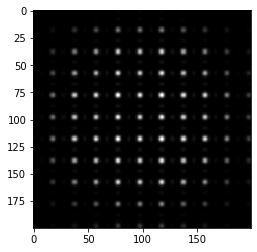

In [9]:
%matplotlib inline
import numpy as np
import scipy.signal
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

class MultiSlice:
    def __init__(self):
        #crystal parameters
        self.a = 2.8665e-10
        self.b = 2.8665e-10
        self.c = 2.8665e-10
        self.alpha = np.pi/2
        self.beta = np.pi/2
        self.ganma = np.pi/2
        
        #wave_length[m]
        self.lamb = 0.02508e-10
        #wave_number
        self.k = 2*np.pi/self.lamb
        #range[m]
        self.deltaZ = 2.8665e-10/2
        self.N = 200
        
        self.D = 5
        
        #accelerating Voltage[eV]
        self.EeV = 200e3
        #accelerating Voltage[J]
        self.E = self.EeV*1.60218e-19
        #camela length[m]
        self.camela_length = 200e-2
        
        #spherical aberration constant[m]
        self.Cs = 0.5e-6
        #Scherzer Focus
        self.deltaf = 1.2*(self.Cs*self.lamb)**(1/2)
        print(self.deltaf)
        
        #Energy spread and Current spread[m]
        self.deltaE = 1.0e-6
        self.deltaJ = 0.5e-6
        #Chromatic aberration constant[m]
        self.Cc = 1.4e-3
        #Envelope function gaussian sigma[m]
        self.sig = self.Cc*((self.deltaE)**2 + (2*self.deltaJ)**2)**(1/2)
        
        self.param_fe = [[0.5627, 0.3859], [1.9685, 3.3103], [2.4527, 18.7003], [2.1750, 71.6636]]
        
        self.G = [[self.a**2, self.a*self.b*np.cos(self.ganma), self.a*self.c*np.cos(self.beta)], [self.b*self.a*np.cos(self.ganma), self.b**2, self.b*self.a*np.cos(self.alpha)], [self.c*self.a*np.cos(self.beta), self.c*self.b*np.cos(self.alpha), self.c**2]]
        self.invG = np.linalg.inv(self.G)
        
        self.sigma = np.pi/(self.lamb*self.E)
        
        self.layers = ['./pos_1.csv', './pos_2.csv', './pos_1.csv', './pos_1.csv', './pos_2.csv', './pos_1.csv']
        
    def import_crystal_position(self, file_name):
        df = pd.read_csv(file_name, encoding="UTF-8")
        x = list(df['x'])
        y = list(df['y'])
        z = list(df['z'])
        r = []
        for i in range(len(x)):
            r.append([x[i], y[i], z[i]])
            
        return r
        
    def compute_F(self, h, k, r):
        fa = 0
        hkl = [h, k, 0]
        thkl = np.transpose(hkl)
        dk = 1/((np.matmul(np.matmul(self.invG, thkl), hkl))**(1/2))
        if(not np.isinf(dk)):
            sinthetalamb = self.lamb/(2*dk)
            for i in range(4):
                fa = fa + self.param_fe[i][0]*np.exp((-self.param_fe[i][1]*(sinthetalamb**2)))
            
        F = 0
        for i in r:
            F = F + fa*np.exp(1.0j*2*np.pi*(h*i[0] + k*i[1]))
        
        return F
    
    def propagator(self, h, k):
        #excitation error
        zeta = self.lamb/2
        zeta = zeta*(h**2 + k**2)
        
        p = np.exp(1.0j*2*np.pi*zeta*self.deltaZ)
        
        return p
    
    def spherical_aberration(self, h, k):
        hkl = [h, k, 0]
        thkl = np.transpose(hkl)
        dk = 1/((np.matmul(np.matmul(self.invG, thkl), hkl))**(1/2))
        u = self.lamb/(2*dk)
        chi = 2*np.pi/self.lamb
        chi = chi*(1/4*self.Cs*u**4 - 1/2*self.deltaf*u**2)
        
        return chi
    
    def chromatic_aberration(self, h, k):
        hkl = [h, k, 0]
        thkl = np.transpose(hkl)
        dk = 1/((np.matmul(np.matmul(self.invG, thkl), hkl))**(1/2))
        u = self.lamb/(2*dk)
        w = np.exp(-(1/2)*(np.pi**2)*(u**4)*(self.sig**2)/(self.lamb**2))
        return w

    def run(self):
        Kx, Ky = np.meshgrid(np.linspace(-self.D, self.D, num=self.N), np.linspace(-self.D, self.D, num=self.N))
        
        f = np.vectorize(self.compute_F)
        f.excluded.add(2)
        
        propagator = np.vectorize(self.propagator)
        
        psi = np.ones((self.N, self.N))
        
        for i in range(len(self.layers) - 1):
            r = self.import_crystal_position(self.layers[i])
            F = f(Kx, Ky, r)
            Vp = np.fft.ifft2(F)
            #weak-phase object approximation
            q = 1 + 1.0j*self.sigma*Vp
            p = propagator(Kx, Ky)
            
            psi = np.fft.fft2(q*psi)*p
            if(i == len(self.layers) - 1):
                break
            else:
                psi = np.fft.ifft2(psi)
        
        spherical_abberration = np.vectorize(self.spherical_aberration)
        Chi = spherical_abberration(Kx, Ky)
        
        chromatic_aberration = np.vectorize(self.chromatic_aberration)
        Ed = chromatic_aberration(Kx, Ky)
        
        psi = np.fft.fft2(psi*np.exp(1.0j*Chi))*Ed
        
        I = np.abs(psi)**2
        I = I/np.max(I)
        
        plt.imshow(I, cmap='gray')
        
        
if __name__ == '__main__':
    a = MultiSlice()
    a.run()